In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/rome_fap_pcs2.csv', sep='|')

In [4]:
df[df.rome == 'N1103']

,rome,fap,pcs2
2039,N1103,J1Z40,652a
2040,N1103,J1Z40,653a
2041,N1103,J1Z40,652b
2059,N1103,J0Z20,676a
2060,N1103,J0Z20,676b
2061,N1103,J0Z20,676c
2062,N1103,J0Z20,676d
2075,N1103,J1Z80,487a
2076,N1103,J1Z80,487b


In [5]:
df[df.pcs2 == '652a']

,rome,fap,pcs2
2033,N1101,J1Z40,652a
2036,N1102,J1Z40,652a
2039,N1103,J1Z40,652a
2042,N1105,J1Z40,652a
2045,N2203,J1Z40,652a
2048,N3203,J1Z40,652a


In [18]:
df = pd.read_csv('../data/rome_fap.csv', sep='|')

In [21]:
df1 = pd.read_csv('../data/pcs_fap.csv', sep=';')

In [23]:
df1.head()

,pcs2,fap
0,220x,R3Z80
1,210x,K0Z40
2,100x,A0740
3,111a,A0Z00
4,121a,A0Z00


In [25]:
len(set(df.fap)), len(set(df1.fap))

(208, 226)

In [27]:
df2 = pd.merge(df, df1, on='fap', how='inner')

In [29]:
df2.to_csv('../data/rome_fap_pcs2.csv', sep='|', index=False)

In [30]:
df2.head()

,rome,fap,pcs2
0,A1101,A0Z43,691a
1,A1201,A0Z42,533b
2,A1201,A0Z42,691f
3,A1204,A0Z42,533b
4,A1204,A0Z42,691f


In [32]:
df2.groupby('rome').pcs2.count().median()

4.0

In [34]:
df2.groupby('pcs2').rome.count().median()

3.0

In [41]:
df2 = df2[['rome', 'pcs2']]
df2.columns = ['rome', 'pcs']

In [119]:
df3 = pd.read_csv('../data/pcs_proche.csv', sep='|')
df3.columns = [el.split(".")[1] for el in df3.columns]

In [120]:
df3.shape

(1270, 2)

In [121]:
df3.head()

,pcs1,pcs2
0,100x,691e
1,100x,691d
2,100x,691c
3,210x,632a
4,210x,643a


In [122]:
res = []
for pcs in list(set(df3.pcs1)):
    df_pcs = df3[df3.pcs1 == pcs].pcs2.values.tolist()
    if len(df_pcs) < 3:
        df_pcs = df_pcs + ['no'] * (3 - len(df_pcs))
    res.append([pcs] + df_pcs)


In [123]:
pcs_proche = pd.DataFrame(res, columns=['pcs', 'pcs1', 'pcs2', 'pcs3'])

In [124]:
pcs_proche.to_csv('../data/pcs_proche_res.csv', sep='|', index=False)

In [125]:
pcs_proche.head()

,pcs,pcs1,pcs2,pcs3
0,462e,543g,543f,542a
1,451e,543g,543b,564b
2,534a,564b,684a,643a
3,526a,563b,525d,526d
4,477a,652a,543g,653a


In [1]:
df4 = pd.read_csv('../data/ale.csv', sep='|')
df4.columns = [el.split(".")[1] for el in df4.columns]

NameError: name 'pd' is not defined

In [128]:
df4.to_csv('../data/ale.csv', sep='|', index=False)

In [138]:
df5 = pd.read_csv('../data/grands_domaines', sep='|')

In [140]:
df5

,num_domaine,lbl_domaine
0,A,"Agriculture et Pêche, Espaces naturels et Espa..."
1,B,Arts et Façonnage d'ouvrages d'art
2,C,"Banque, Assurance, Immobilier"
3,D,"Commerce, Vente et Grande distribution"
4,E,"Communication, Média et Multimédia"
5,F,"Construction, Bâtiment et Travaux publics"
6,G,"Hôtellerie-Restauration, Tourisme, Loisirs et ..."
7,H,Industrie
8,I,Installation et Maintenance
9,J,Santé


In [136]:
df5 = df5.drop_duplicates()

In [251]:
df5.to_csv('../data/grands_domaines.csv', sep='|', index=False)

In [142]:
df6 = pd.read_csv('../data/counter_ind_agences.csv', sep='|')
df6.columns = [el.split(".")[1] for el in df6.columns]

In [145]:
df6.head()

,dc_structure,ind_counter
0,33004,4169
1,33012,7
2,33024,7142
3,33025,8472
4,33033,6687


In [146]:
df6.to_csv('../data/counter_ind_agences.csv', sep='|', index=False)

In [147]:
df5

,num_domaine,lbl_domaine
0,A,"Agriculture et Pêche, Espaces naturels et Espa..."
1,B,Arts et Façonnage d'ouvrages d'art
2,C,"Banque, Assurance, Immobilier"
3,D,"Commerce, Vente et Grande distribution"
4,E,"Communication, Média et Multimédia"
5,F,"Construction, Bâtiment et Travaux publics"
6,G,"Hôtellerie-Restauration, Tourisme, Loisirs et ..."
7,H,Industrie
8,I,Installation et Maintenance
9,J,Santé


In [173]:
import random
import matplotlib.cm as cm
my_cmap = cm.get_cmap('jet')

fake_number = [random.uniform(0.1, 0.8) for i in range(14)]
fake_number = [round(el, 2) for el in fake_number]

In [174]:
fake_number

[0.5,
 0.37,
 0.44,
 0.79,
 0.33,
 0.35,
 0.13,
 0.16,
 0.55,
 0.65,
 0.34,
 0.49,
 0.53,
 0.27]

In [175]:
df5['domaine'] = df5.apply(lambda x: x['num_domaine'] + ' : ' + x['lbl_domaine'], axis=1)

In [176]:
df5['potentiel'] = fake_number

In [177]:
df5

,num_domaine,lbl_domaine,domaine,potentiel
0,A,"Agriculture et Pêche, Espaces naturels et Espa...","A : Agriculture et Pêche, Espaces naturels et ...",0.50
1,B,Arts et Façonnage d'ouvrages d'art,B : Arts et Façonnage d'ouvrages d'art,0.37
2,C,"Banque, Assurance, Immobilier","C : Banque, Assurance, Immobilier",0.44
3,D,"Commerce, Vente et Grande distribution","D : Commerce, Vente et Grande distribution",0.79
4,E,"Communication, Média et Multimédia","E : Communication, Média et Multimédia",0.33
5,F,"Construction, Bâtiment et Travaux publics","F : Construction, Bâtiment et Travaux publics",0.35
6,G,"Hôtellerie-Restauration, Tourisme, Loisirs et ...","G : Hôtellerie-Restauration, Tourisme, Loisirs...",0.13
7,H,Industrie,H : Industrie,0.16
8,I,Installation et Maintenance,I : Installation et Maintenance,0.55
9,J,Santé,J : Santé,0.65


In [218]:
plt.rcParams['font.size'] = '16'

In [247]:
def autolabel(bar_plot, ax, labels_list, values_list):
    for idx, rect in enumerate(bar_plot):
        if values_list is not None:
            ax.text(-1, rect.get_y() + rect.get_height() / 3,
                    labels_list[idx] + ' : ' + str(int(values_list[idx] * 100)) + '%')
        else:
            ax.text(-1, rect.get_y() + rect.get_height() / 3, labels_list[idx])

def plot_grands_domaines(df):
    fig, ax = plt.subplots(figsize=(10, 8))
    color_list = ['teal', 'tomato', 'mediumseagreen', 'royalblue', 'gold', 'coral', 'deeppink'] * 2
    labels_list = list(df.index)
    labels_list = df.domaine.tolist()
    values_list = df.potentiel.tolist()
    bar_plot = plt.barh(labels_list, values_list, color=color_list)
    ax.set_xticks([])
    #ax.axis('off')

    #autolabel(bar_plot, ax, labels_list, values_list)

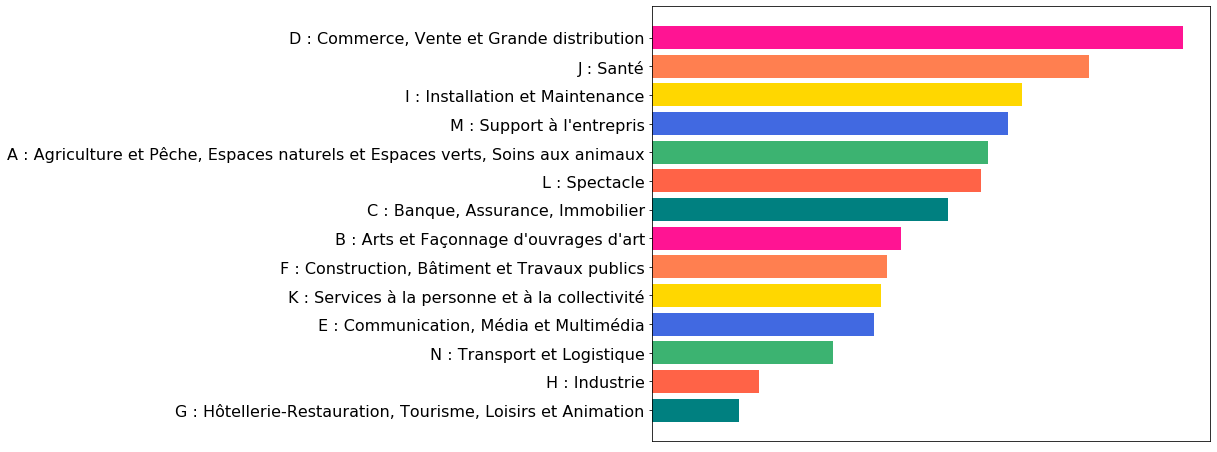

In [250]:
plot_grands_domaines(df5.sort_values(by='potentiel'))

In [254]:
df6 = pd.read_csv('../data/offers.csv', sep='|')

In [256]:
df6 = df6[['dc_rome_id', 'dc_lblrome']]
df6 = df6.drop_duplicates()

In [258]:
df6.to_csv('../data/liste_rome.csv', sep='|', index=False)